In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import colors

## Func

In [2]:
def _mask_YCbCr(img_YCbCr, cb_lw, cb_hg, cr_lw, cr_hg):
    Y, Cb, Cr = img_YCbCr[:, :, 0], img_YCbCr[:, :, 1], img_YCbCr[:, :, 2]
    Cb_L = Cb.flatten()
    Cr_L = Cr.flatten()
    check = []
    for i in range(len(Cb_L)):
        cb = Cb_L[i]
        cr = Cr_L[i]    
        if cb>=cb_lw and cb<=cb_hg and cr>=cr_lw and cr<=cr_hg:
            check.append(True)
        else:
            check.append(False)    

    mask = (np.reshape(check, (h, w)))[:, : ,np.newaxis]
    result = np.multiply(img, mask)
    return result

## img

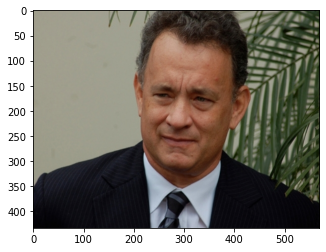

In [3]:
img_P = "./img/TomHanksApr09.jpg"
# img_P = "./img/tom-cruise-vanessa-kirby-mission-impossible-fallout-1564649325.bmp"
img = cv2.imread(img_P)    # bgr

fig = plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## CCL

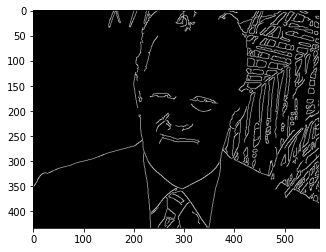

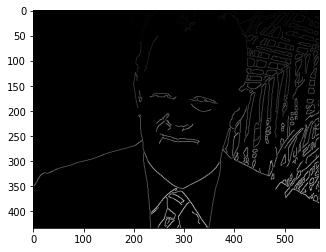

In [23]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
img_edge = cv2.Canny(img_blur, 50, 180)

num_obj, labels = cv2.connectedComponents(img_edge)

fig = plt.figure()
plt.imshow(img_edge, cmap='gray')

fig = plt.figure()
plt.imshow(labels, cmap='gray')